In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import calc_helpers as hp 

In [2]:
# --------------------------
# Material Densities (kN/m3)
# --------------------------
𝝆_con = 24.0
𝝆_scr = 20.0

In [3]:
w_scre = 0.075 * 𝝆_scr
w_slab = 3.0
w_ceil = 0.25
w_flor = round(w_scre + w_slab + w_ceil, 2)
print(f'Floor dead weight = {w_flor} kN/m2')

Floor dead weight = 4.75 kN/m2


In [4]:
appld_LL = 2.5
trib_len = 1.5
dead_udl = round(w_flor * trib_len, 2)
live_udl = round(appld_LL * trib_len, 2)
print(f'Dead UDL = {dead_udl} kN/m')
print(f'Live UDL = {live_udl} kN/m')

Dead UDL = 7.12 kN/m
Live UDL = 3.75 kN/m


In [5]:
L1 = 4.98
L2 = 1.995
supports = ['pin', 'pin', 'free']
spans = [L1, L2]

E  = 210e6    # kN/m^2 (steel)
I  = 2.34e-5  # m^4 for UB 203x133x25

In [6]:
# SLS [1.0 D L + 1.0 LL]
# ======================
wD = (8.18 + 0.25) * 1.0
wQ = 3.75 * 1.0
w_total = wD + wQ

loads_sls1 = [w_total, w_total]
res_sls1 = hp.analyze_beam(spans, loads_sls1, supports, E, I)

x = res_sls1["x"]
V = res_sls1["V"]
M = res_sls1["M"]
v = res_sls1["v"]

# --- Rounded results ---
M_min = round(M.min(), 1)
M_max = round(M.max(), 1)
v_max = round(v.max() * 1000, 1)   # mm (downward is positive)
v_min = round(v.min() * 1000, 1)   # mm (downward is positive)

support_positions = [round(p, 3) for p in res_sls1["support_positions"]]
support_reactions = [round(r, 1) for r in res_sls1["support_reactions"]]

# --- Output ---
print("Support positions (m):", support_positions)
print("Support reactions (kN):", support_reactions)
print("Max sagging M (kNm):", M_max)
print("Max hogging M (kNm):", M_min)
print("Max +ve deflection (mm):", v_max)
print("Max -ve deflection (mm):", v_min)

Support positions (m): [0.0, 4.98]
Support reactions (kN): [25.5, 59.5]
Max sagging M (kNm): 26.6
Max hogging M (kNm): -24.1
Max +ve deflection (mm): 12.3
Max -ve deflection (mm): -4.2


In [7]:
dG = hp.tip_deflection_overhang(L1, L2, wD, E, I)
dQ = hp.tip_deflection_overhang(L1, L2, wQ, E, I)
d_total = hp.tip_deflection_overhang(L1, L2, wD + wQ, E, I)

print("Dead defl (mm):  ", round(dG * 1e3, 1))
print("Live defl (mm):  ", round(dQ * 1e3, 1))
print("Total defl (mm): ", round(d_total * 1e3, 1))

Dead defl (mm):   2.9
Live defl (mm):   1.3
Total defl (mm):  4.2


In [12]:
criteria_factor_t = 180
criteria_factor_s = 180
span_deflection_chk_s = L1
span_deflection_chk_t = L2
allow_deflection_t = round((span_deflection_chk_t*1000)/criteria_factor_t, 1)
allow_deflection_s = round((span_deflection_chk_s*1000)/criteria_factor_s, 1)
print(f'Allowable tip deflection = {allow_deflection_t} mm')
print(f'Allowable spn deflection = {allow_deflection_s} mm')

Allowable tip deflection = 11.1 mm
Allowable spn deflection = 27.7 mm


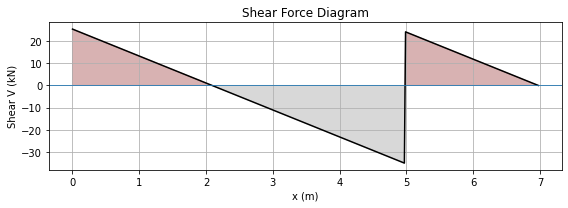

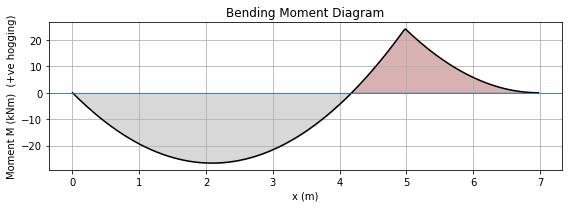

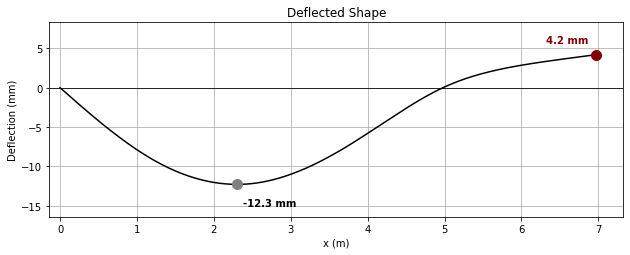

In [9]:
hp.plot_shear_moment_deflection(x, V, M, -v*1000)

In [10]:
# ULS [1.4D L + 1.6 LL]
# ======================
wD = (8.18 + 0.25) * 1.4
wQ = 3.75 * 1.6
w_total = wD + wQ

loads_uls1 = [w_total, w_total]  # same UDL both spans
res_uls1 = hp.analyze_beam(spans, loads_uls1, supports, E, I)

x = res_uls1["x"]
V = res_uls1["V"]
M = res_uls1["M"]
v = res_uls1["v"]

# --- Rounded results ---
M_min = round(M.min(), 1)
M_max = round(M.max(), 1)
v_max = round(v.min() * 1000, 1)   # mm (downward is negative)

support_positions = [round(p, 3) for p in res_uls1["support_positions"]]
support_reactions = [round(r, 1) for r in res_uls1["support_reactions"]]

# --- Output ---
print("Support positions (m):", support_positions)
print("Support reactions (kN):", support_reactions)
print("Max sagging M (kNm):", M_max)
print("Max hogging M (kNm):", M_min)
print("Max deflection (mm):", v_max)

Support positions (m): [0.0, 4.98]
Support reactions (kN): [37.2, 87.0]
Max sagging M (kNm): 38.9
Max hogging M (kNm): -35.2
Max deflection (mm): -6.1


UB 203 beam supports profiled metal decking spanning transversely, shot-fixed to the top flange at max 300 mm centres. The composite slab is continuous across the beam. In accordance with SCI P300/P341, the decking and slab provide effective lateral restraint to the compression flange; the beam is therefore designed as laterally restrained in the final condition. No composite action in bending is assumed (no shear studs). **Mc,y,Rd = 71.0 kNm**

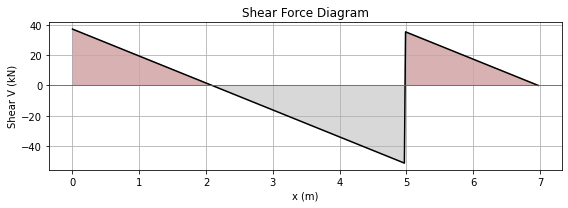

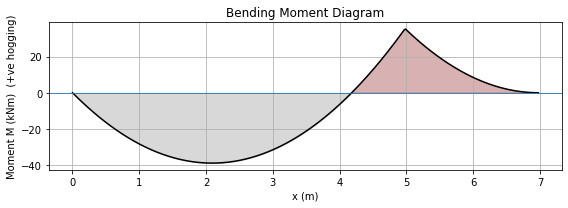

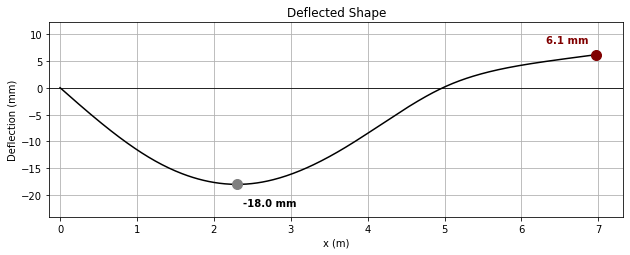

In [11]:
hp.plot_shear_moment_deflection(x, V, M, -v*1000)

In [22]:
# Single Span Central Beam
L1 = 5.2
supports = ['pin', 'pin']
spans = [L1]

In [42]:
# SLS [1.0 D L + 1.0 LL]
# ======================
print(f'* Floor dead weight = {w_flor} kN/m2')
wD = (w_flor * ((2.505 + 2.730)/2 + 0.25) * 1.0)
wQ = (2.5 * (2.505 + 2.730)/2 * 1.0)
w_total = wD + wQ
print(f'* Total unfactored udl = {round(w_total, 1)} kN/m')

loads_sls1 = [w_total]
res_sls1 = hp.analyze_beam(spans, loads_sls1, supports, E, I)

x = res_sls1["x"]
V = res_sls1["V"]
M = res_sls1["M"]
v = res_sls1["v"]

# --- Rounded results ---
M_min = round(M.min(), 1)
M_max = round(M.max(), 1)
v_max = round(v.max() * 1000, 1)   # mm (downward is positive)
v_min = round(v.min() * 1000, 1)   # mm (downward is positive)

support_positions = [round(p, 3) for p in res_sls1["support_positions"]]
support_reactions = [round(r, 1) for r in res_sls1["support_reactions"]]

# --- allowable deflections ---
criteria_factor_s = 350
span_deflection_chk_s = L1
allow_deflection_s = round((span_deflection_chk_s*1000)/criteria_factor_s, 1)

# --- Output ---
print("⇢ Support positions (m):", support_positions)
print("⇢ Support reactions (kN):", support_reactions)
print("⇢ Max sagging M (kNm):", M_max)
print("⇢ Max +ve deflection (mm):", v_max)
print(f'⇢ Allowable spn deflection (mm) = {allow_deflection_s}')

* Floor dead weight = 4.75 kN/m2
* Total unfactored udl = 20.2 kN/m
⇢ Support positions (m): [0.0, 5.2]
⇢ Support reactions (kN): [52.4, 52.4]
⇢ Max sagging M (kNm): 68.2
⇢ Max +ve deflection (mm): 11.4
⇢ Allowable spn deflection (mm) = 14.9


In [31]:
# ULS [1.4D L + 1.6 LL]
# ======================
wD = (w_flor * ((2.505 + 2.730)/2 + 0.25) * 1.4)
wQ = (2.5 * (2.505 + 2.730)/2 * 1.6)
w_total = wD + wQ
print(f'Total factored udl = {round(w_total, 1)} kN/m')

loads_uls1 = [w_total]  
res_uls1 = hp.analyze_beam(spans, loads_uls1, supports, E, I)

x = res_uls1["x"]
V = res_uls1["V"]
M = res_uls1["M"]
v = res_uls1["v"]

# --- Rounded results ---
M_min = round(M.min(), 1)
M_max = round(M.max(), 1)
v_max = round(v.min() * 1000, 1)   # mm (downward is negative)

support_positions = [round(p, 3) for p in res_uls1["support_positions"]]
support_reactions = [round(r, 1) for r in res_uls1["support_reactions"]]

# --- Output ---
print("Support positions (m):", support_positions)
print("Support reactions (kN):", support_reactions)
print("Max sagging M (kNm):", M_max)

Total factored udl = 29.5 kN/m
Support positions (m): [0.0, 5.2]
Support reactions (kN): [76.8, 76.8]
Max sagging M (kNm): 99.8
